#### Rebuild the models from first_models.ipynb, but  write out train and test probabilities and values for each model to files so as not to need to re-fit these models.  We rename the classifiers from first_models.ipynb for consistency.

#### These datafiles can then be used to expore different metrics for all the models (see standard_metrics.ipynb).

#### The predictions on the holdout set are already saved (also renamed for consistency). 

#### Classifier names

| name in first_models | name in this file  | comment
|----------------------|--------------------|----------------
|  clf                 |  mod0      |  numerical features only
|  pl                  |  mod1      |  add pipeline; use text and numbers
|  pl_rf               |  mod2      |  swap in RandomForest for classifier
|  pl_03               |  mod3      |  back to logistic regression; add bigrams
|  pl_05               |  mod4      |  swap in HashingVectorizer; add feature interaction        

#### Train/test probabilities and values, variable and file names

* mod0
    * np.save('fmm_out/mod0_train_probas', mod0_yhat_train_probas)
    * np.save('fmm_out/mod0_test_probas', mod0_yhat_test_probas)
    * np.save('fmm_out/mod0_y_train',       y_train.values)
    * np.save('fmm_out/mod0_y_test',       y_test.values)

* mod1    
    * np.save('fmm_out/mod1_train_probas', mod1_yhat_train_probas)
    * np.save('fmm_out/mod1_test_probas', mod1_yhat_test_probas)
    * np.save('fmm_out/mod1_y_train',       y_train.values)
    * np.save('fmm_out/mod1_y_test',       y_test.values)
    
* mod2

    * np.save('fmm_out/mod1_train_probas', mod1_yhat_train_probas)
    * np.save('fmm_out/mod1_test_probas', mod1_yhat_test_probas)
    * np.save('fmm_out/mod1_y_train',       y_train.values)
    * np.save('fmm_out/mod1_y_test',       y_test.values)

* mod3

    * np.save('fmm_out/mod3_f_train_probas', mod3_train_probas)
    * np.save('fmm_out/mod3_test_probas_flat', mod3_test_probas)
    * np.save('fmm_out/mod3_y_train',       y_train.values)
    * np.save('fmm_out/mod3_y_test',       y_test.values)

* mod4

    * np.save('fmm_out/mod4_f_train_probas', mod4_train_probas)
    * np.save('fmm_out/mod4_test_probas_flat', mod4_test_probas)
    * np.save('fmm_out/mod4_y_train',       y_train.values)
    * np.save('fmm_out/mod4_y_test',       y_test.values)
    
Predictions on holdout set; these were all written by first_models (not this file).

##### Note: The probabilty prediction files written by  first_models.ipynb have been renamed and moved to the 'submitted' directory.

|old name | new name |  model |          comment
|---------|----------|--------------------------------
|predictions.csv     |   t_00.csv                   | 1st model | numerical features only
|sub2.csv            |   t_01.csv                   | 2nd model | add pipeline; use text and numbers
|sub_rf_defaults.csv |   t_02.csv                   | 3rd model | swap in RandomForest for classifier
|sub3.csv            |   t_03.csv                   | 4th model | back to logistic regression; add bigrams
|subm4.csv           |   t_04.csv                   | 5th model | swap in HashingVectorizer; add feature interaction


#### Imports/setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 60)

from timeit import default_timer as timer

#### Load the data

In [2]:
# Get data
df = pd.read_csv('data/TrainingData.csv', index_col=0)

In [3]:
# take a look
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,NaN,NaN,TCHER 2ND GRADE,NaN,Regular Instruction,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,EMPLOYEE BENEFITS,TEACHER SUBS,GENERAL FUND,"Teacher, Short Term Sub",Regular,NaN,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,TEACHER COVERAGE FOR TEACHER,TEACHER SUBS,GENERAL FUND,"Teacher, Secondary (High)",Alternative,NaN,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


##### take a quick look at the dtypes

In [4]:
df.dtypes

Function                   object
Use                        object
Sharing                    object
Reporting                  object
Student_Type               object
Position_Type              object
Object_Type                object
Pre_K                      object
Operating_Status           object
Object_Description         object
Text_2                     object
SubFund_Description        object
Job_Title_Description      object
Text_3                     object
Text_4                     object
Sub_Object_Description     object
Location_Description       object
FTE                       float64
Function_Description       object
Facility_or_Department     object
Position_Extra             object
Total                     float64
Program_Description        object
Fund_Description           object
Text_1                     object
dtype: object

####  Encode the targets as categorical variables

In [5]:
### bind variable LABELS - these are actually the targets and we're going to one-hot encode them...
LABELS = ['Function',  'Use',  'Sharing',  'Reporting',  'Student_Type',  'Position_Type', 
          'Object_Type',  'Pre_K',  'Operating_Status']

### This turns out to be key.  Submission requires the dummy versions of these vars to be in this order.
LABELS.sort()

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Object_Type         category
Operating_Status    category
Position_Type       category
Pre_K               category
Reporting           category
Sharing             category
Student_Type        category
Use                 category
dtype: object


#### Counting unique labels

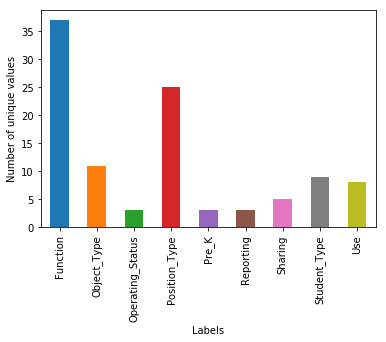

In [6]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique, axis=0)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

In [7]:
num_unique_labels

Function            37
Object_Type         11
Operating_Status     3
Position_Type       25
Pre_K                3
Reporting            3
Sharing              5
Student_Type         9
Use                  8
dtype: int64

In [8]:
np.sum(num_unique_labels)

104

##### Let's save the unique labels for each output (category)

In [9]:
# build a dictionary
cols_dict = {col : df[col].unique().tolist() for col in df[LABELS].columns}

In [10]:
cols_dict['Function']

['Teacher Compensation',
 'NO_LABEL',
 'Substitute Compensation',
 'Facilities & Maintenance',
 'Instructional Materials & Supplies',
 'Food Services',
 'Security & Safety',
 'Utilities',
 'Student Transportation',
 'Parent & Community Relations',
 'Extended Time & Tutoring',
 'Enrichment',
 'Special Population Program Management & Support',
 'School Supervision',
 'Data Processing & Information Services',
 'Aides Compensation',
 'Physical Health & Services',
 'Career & Academic Counseling',
 'Library & Media',
 'Professional Development',
 'School Administration',
 'Other Non-Compensation',
 'Social & Emotional',
 'Finance, Budget, Purchasing & Distribution',
 'Human Resources',
 'Curriculum Development',
 'Legal',
 'Other Compensation',
 'Student Assignment',
 'Governance',
 'Development & Fundraising',
 'Research & Accountability',
 'Recruitment',
 'Insurance',
 'Untracked Budget Set-Aside',
 'Communications',
 'Facilities Planning']

#### Setting up a train-test split  for modeling

The first step is to split the data into a training set and a test set. Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. The function multilabel_train_test_split (in this directory) will make sure at least *min_count* examples of each label appear in each split.

We start with a simple model that uses just the numeric columns of the datawhen calling multilabel_train_test_split. 

Also, we one-hot encode the labels as advised in the tutorial.  This creates 104 columns of binary label columns.

In [11]:
from python.multilabel import multilabel_train_test_split

In [12]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [13]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info()) 

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
FTE      320222 non-null float64
Total    320222 non-null float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Data columns (total 2 columns):
FTE      80055 non-null float64
Total    80055 non-null float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 413949
Columns: 104 entries, Function_Aides Compensation to Use_Untracked Budget Set-Aside
dtypes: uint8(104)
memory usage: 8.6 MB
None


In [14]:
df[NUMERIC_COLUMNS].shape

(400277, 2)

#### Start with a simple model

The first model ignores everything but the two numeric columns  to get started and check for correct format (104 columns of probability predictions).  Create a multi-label classifier clf by placing LogisticRegression() inside OneVsRestClassifier().

In [15]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create the DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000)

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)
# Instantiate the classifier: clf
mod0 = OneVsRestClassifier(LogisticRegression(), n_jobs=-1)

start = timer()
# Fit the classifier to the training data
mod0.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

fit time: 100.04255839071291 seconds


In [16]:
# Print the accuracy scores
from sklearn.metrics import accuracy_score

# get the predictions
mod0_yhat_train = mod0.predict(X_train)
mod0_yhat_test = mod0.predict(X_test)

In [17]:
mod0_yhat_train.shape, mod0_yhat_test.shape

((320222, 104), (80055, 104))

#### Not very accurate but correct format.

The sklearn.metrics.accuracy function doesn't do the expected thing because the predictions of this model (and the y values they are compared to) are somewhat different than the usual situation. To summarize: the model is better than this - see standard_metrics.ipynb for details.

In [18]:
print('train accuracy: {:.6f}'.format(accuracy_score(mod0_yhat_train, y_train)))
print('test accuracy: {:.6f}'.format(accuracy_score(mod0_yhat_train, y_train)))

train accuracy: 0.000012
test accuracy: 0.000012


### Metrics

Try the different log_loss metrics I have, knowing that DD scored this model at 1.3314

In [19]:
### Official loss metric
### From https://github.com/drivendataorg/metrics/blob/master/metrics.py

import numpy as np
from sklearn.metrics import roc_auc_score, r2_score

# Defined for your convenience; these are the
# class_column_indices for the Box-Plots for Education competition
# www.drivendata.org/competitions/4/
BOX_PLOTS_COLUMN_INDICES = [range(37),
                            range(37, 48),
                            range(48, 51),
                            range(51, 76),
                            range(76, 79),
                            range(79, 82),
                            range(82, 87),
                            range(87, 96),
                            range(96, 104)]

BPCI = BOX_PLOTS_COLUMN_INDICES

def multi_multi_log_loss(predicted, actual, class_column_indices, eps=1e-15):
    """Multi class, multi-label version of Logarithmic Loss metric.
    :param predicted: a 2d numpy array of the predictions that are probabilities [0, 1]
    :param actual: a 2d numpy array of the same shape as your predictions. 1 for the actual labels, 0 elsewhere
    :return: The multi-multi log loss score for this set of predictions
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)

    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices]

        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs

    return np.average(class_scores)

In [20]:
### First we need the probabilities, not the predicted labels
mod0_yhat_train_probas = mod0.predict_proba(X_train)
mod0_yhat_test_probas = mod0.predict_proba(X_test)

In [21]:
multi_multi_log_loss(mod0_yhat_train_probas, y_train.values, BOX_PLOTS_COLUMN_INDICES)

1.353521736853036

In [22]:
multi_multi_log_loss(mod0_yhat_test_probas, y_test.values, BOX_PLOTS_COLUMN_INDICES)

1.3557282270290794

### We only need to save probability predictions and y values.

As proved in flat_to_labels.ipynb, the predictions of 1vs103 approach are not usable without post processing.  But the probability output can be turned into standard multi-target labels with the function, flat_to_labels.

The implication is that it doesn't make sense to keep yhats, only y_probas.  The reconstituted predictions are the same as you would get from 9 multi-label classifiers (one per target) and they can be used to run the standard sklearn metrics.

In [23]:
np.save('fmm_out/mod0_train_probas', mod0_yhat_train_probas)
np.save('fmm_out/mod0_test_probas', mod0_yhat_test_probas)
np.save('fmm_out/mod0_y_train',       y_train.values)
np.save('fmm_out/mod0_y_test',       y_test.values)

#### Submitted prediction file and scored 1.33.  Best prediction is 0.37 (log_loss).

__================ End of Model 0 ==================__

### Add text processing to the model

#### Combining text columns for tokenization

The tutorial recommends combining all the text columns into a single string.

In [24]:
# define combine_text_columns()
def combine_text_columns(df, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text columns in each row of df to single string """
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(df.columns.tolist())
    text_data = df.drop(to_drop, axis=1)  
    # Replace nans with blanks
    text_data.fillna('', inplace=True)    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [25]:
# test it
combine_text_columns(df.sample(n=10))

397349    SUPPLIES                         TEACHER, MATH...
181594    EMPLOYEE BENEFITS  GENERAL FUND Teacher, Short...
178741       Teacher-Art       ART  PRIMARY GRADES PROGR...
127259    OTHER PERSONAL SERVICES          SUB TEACHER A...
312022    SALARIES OF PART TIME EMPLOYEE  DISTRICT SPECI...
207135    SALARIES OF PART TIME EMPLOYEE  DISTRICT SPECI...
425110    ADDITIONAL/EXTRA DUTY PAY/STIP  GENERAL FUND T...
223981    Personal Services - Substitute Teachers Certif...
430816    SALARIES OF REGULAR EMPLOYEES  LEVY OVERRIDE E...
212038    CONTRA BENEFITS  GENERAL FUND Teacher, Element...
dtype: object

#### What's in a token?
Now you will use combine_text_columns to convert all training text data in your DataFrame to a single vector that can be passed to the vectorizer object and made into a bag-of-words using the .fit_transform() method.

You'll compare the effect of tokenizing using any non-whitespace characters as a token and using only alphanumeric characters as a token.

##### INSTRUCTIONS

Import CountVectorizer from sklearn.feature_extraction.text.
Instantiate vec_basic and vec_alphanumeric using, respectively, the TOKENS_BASIC and TOKENS_ALPHANUMERIC patterns.
Create the text vector by using the combine_text_columns() function on df.
Using the .fit_transform() method with text_vector, fit and transform first vec_basic and then vec_alphanumeric. Print the number of tokens they contain.

In [26]:
# Import the CountVectorizer
from  sklearn.feature_extraction.text import CountVectorizer
# Create the basic token pattern; separates based on whitespace
TOKENS_BASIC = '\\S+(?=\\s+)'
# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)
# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
# Create the text vector
text_vector = combine_text_columns(df)
# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)
# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))
# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)
# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 4757 tokens in the dataset
There are 3284 alpha-numeric tokens in the dataset


In [27]:
print(vec_basic.get_feature_names()[:16])

['"(year', '"building', '"guidance,', '"human', '"maintenance,', '"multilingual', '"performing', '"software,', '"technology', '"title', '%', '&', '&materials', '&program', '&wildlife', '(']


In [28]:
print(vec_alphanumeric.get_feature_names()[:16])

['00a', '12', '1st', '2nd', '3rd', '4th', '5', '56', '5th', '6', '60', '60hrs', '6th', '70', '70h', '70hr']


#### Add pipeline

The tutorial introducing a pipeline to consolidate preprocessing and modeling in a single classifier/estimator and to facilitate experimentation with both preprocessing and different models.

#### Rebinding X/y train/test...

It needs to be done because X is a different feature subset.  It's likely that the indices are the same as before.  I'd like to check it

In [29]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

# Split into training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)
# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [30]:
# for the pipeline
from sklearn.pipeline import Pipeline
# for the selectors
from sklearn.preprocessing import FunctionTransformer
# for gluing preprocessed text and numbers together
from sklearn.pipeline import FeatureUnion
# for nans in the numeric data
from sklearn.preprocessing import Imputer

#### Build the pipeline

In [31]:
# Complete the pipeline: pl
mod1 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([('selector', get_numeric_data),
                                               ('imputer', Imputer())])),
                ('text_features', Pipeline([('selector', get_text_data),
                                            ('vectorizer', CountVectorizer())]))
             ])),
        ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
    ])

start = timer()
# Fit to the training data
mod1.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

fit time: 418.17933918888946 seconds


In [32]:
# Print the accuracy scores, but see note above on using accuracy on this output.
mod1_yhat_train = mod1.predict(X_train)
mod1_yhat_test = mod1.predict(X_test)

In [33]:
print('train accuracy: {:.4f}'.format(accuracy_score(mod1_yhat_train, y_train)))
print('test accuracy: {:.4f}'.format(accuracy_score(mod1_yhat_train, y_train)))

train accuracy: 0.3493
test accuracy: 0.3493


In [34]:
### For log loss we need the probabilities, not the predicted labels
mod1_yhat_train_probas = mod1.predict_proba(X_train)
mod1_yhat_test_probas = mod1.predict_proba(X_test)

In [35]:
multi_multi_log_loss(mod1_yhat_train_probas, y_train.values, BOX_PLOTS_COLUMN_INDICES)

0.5110256169364263

In [36]:
multi_multi_log_loss(mod1_yhat_test_probas, y_test.values, BOX_PLOTS_COLUMN_INDICES)

0.5117387856670895

##### save results

In [37]:
np.save('fmm_out/mod1_train_probas', mod1_yhat_train_probas)
np.save('fmm_out/mod1_test_probas', mod1_yhat_test_probas)
np.save('fmm_out/mod1_y_train',       y_train.values)
np.save('fmm_out/mod1_y_test',       y_test.values)

### Submitted and scored with log-loss of 0.75.

***

### ===========================================================

***

#### Try a different class of model, RandomForestClassifier

Unlike the model above,  the RFCs predictions come out in a different format (list of 104 2-d arrays with a probability for both 1 and 0).  This needs to be reshaped for submission.

This model is overfit, which is to be expected with default parameters.

In [38]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Edit model step in pipeline
pl_rf = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_jobs=-1))
    ])
start = timer()
# Fit to the training data
pl_rf.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

fit time: 133.67552510826226 seconds


In [39]:
# Compute and print accuracy
# Print the accuracy scores
pl_rf_yhat_train = pl_rf.predict(X_train)
pl_rf_yhat_test = pl_rf.predict(X_test)

In [40]:
print('train accuracy: {:.4f}'.format(accuracy_score(pl_rf_yhat_train, y_train)))
print('test accuracy: {:.4f}'.format(accuracy_score(pl_rf_yhat_test, y_test)))

train accuracy: 0.9854
test accuracy: 0.9056


### Get train/test probas in correct format for dd_mmll and flat_to_labels

In [41]:
pl_rf_train_probas = pl_rf.predict_proba(X_train)
pl_rf_test_probas = pl_rf.predict_proba(X_test)

In [42]:
# check type.  It's list, not array
type(pl_rf_train_probas)

list

In [43]:
# what is the shape of elements?  2 probabilities, 1st is for 0, 2nd is for 1
pl_rf_train_probas[0].shape

(320222, 2)

In [44]:
# grab the probabilities for 1 and turn into array of the correct shape
pl_rf_train_probas_flat = np.concatenate([x[:, 1].reshape(-1,1) for x in pl_rf_train_probas], axis=1)

In [45]:
# check shape
pl_rf_train_probas_flat.shape

(320222, 104)

#### Look at some of the probabilties.  

In [46]:
pl_rf_train_probas_flat[0,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.])

In [47]:
# capture all the unique values and their counts
da_probs = np.unique(pl_rf_train_probas_flat, return_counts=True)

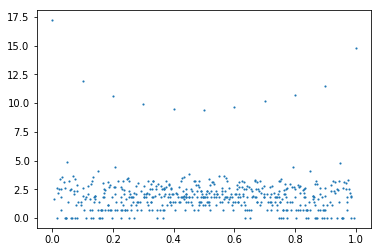

In [48]:
# plot the values and log of the counts; most common are 0 and 1
plt.scatter(da_probs[0], np.log(da_probs[1]), marker='.', s=5)

#### Predict on the holdout set

In [49]:
pl_rf_test_probas_flat = np.concatenate([x[:, 1].reshape(-1,1) for x in pl_rf_test_probas], axis=1)

#### Calculate the dd_mmll for train and test.

In [50]:
multi_multi_log_loss(pl_rf_train_probas_flat, y_train.values, BOX_PLOTS_COLUMN_INDICES)

0.016416194134729067

In [51]:
multi_multi_log_loss(pl_rf_test_probas_flat, y_test.values, BOX_PLOTS_COLUMN_INDICES)

0.27993204928582904

In [52]:
##### save results

np.save('fmm_out/pl_rf_train_probas_flat', pl_rf_train_probas_flat)
np.save('fmm_out/pl_rf_test_probas_flat', pl_rf_test_probas_flat)
np.save('fmm_out/pl_rf_y_train',       y_train.values)
np.save('fmm_out/pl_rf_y_test',       y_test.values)

#### Submitted 28may2018

##### Score on holdout set predictions is 1.6491. Much worse even though accuracy and log loss is great.


#### =================================== End of Mod02 =============================================

### Mod03: Add features to the pipeline

1. Add bigrams to CountVectorizer and tokenize on alphanumeric (previously was used with default settings)
2. Dimension reduction with SelectKBest using chi-squared (300 features).
3. Scale all features to range \[-1, 1\] with MaxAbsScaler
4. Go back to OneVsAll(LogisticRegression)

In [53]:
# Import pipeline
# from sklearn.pipeline import Pipeline

# # Import classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier

# # Import CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# Import other preprocessing modules
# from sklearn.preprocessing import Imputer
from sklearn.feature_selection import chi2, SelectKBest

# Select 300 best features
chi_k = 300

# Import functional utilities
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
pl_03 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    # soup up vectorizer a bit
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
    ])

##### They haven't fitted or predicted with this model in the course.  It seems natural to do that.  Here we go.

In [54]:
start = timer()
# Fit to the training data
pl_03.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

fit time: 253.41003526521558 seconds


In [55]:
# Compute and print accuracy
# Print the accuracy scores
yhat_train = pl_03.predict(X_train)
yhat_test = pl_03.predict(X_test)

In [56]:
print('train accuracy: {:.4f}'.format(accuracy_score(yhat_train, y_train)))
print('test accuracy: {:.4f}'.format(accuracy_score(yhat_train, y_train)))

train accuracy: 0.5489
test accuracy: 0.5489


In [57]:
mod3_train_probas = pl_03.predict_proba(X_train)
mod3_test_probas = pl_03.predict_proba(X_test)

In [58]:
##### save results
np.save('fmm_out/mod3_f_train_probas', mod3_train_probas)
np.save('fmm_out/mod3_test_probas_flat', mod3_test_probas)
np.save('fmm_out/mod3_y_train',       y_train.values)
np.save('fmm_out/mod3_y_test',       y_test.values)

In [59]:
multi_multi_log_loss(mod3_train_probas, y_train.values, BOX_PLOTS_COLUMN_INDICES)

0.3560730331295568

In [60]:
multi_multi_log_loss(mod3_test_probas, y_test.values, BOX_PLOTS_COLUMN_INDICES)

0.35718663072807594

#### Submitted model with bigrams, dimension reduction and scaling - score is 0.8174.  Not as good as 2nd model, but  pretty close.

It may be that tossing all those features (there are 29k of them) is overdoing it. Also, maybe not the best choice of dimension reduction. 

#### ================================ End of mod3 =========================================

### Mod4: Add feature interactions 

The tutorial provides a utility transformer called SparseInteractions. This add features to the model based on the combination of each feature pair.

In [61]:
from python.sparse_interactions import SparseInteractions

# # Instantiate pipeline: pl
# pl = Pipeline([
#         ('union', FeatureUnion(
#             transformer_list = [
#                 ('numeric_features', Pipeline([
#                     ('selector', get_numeric_data),
#                     ('imputer', Imputer())
#                 ])),
#                 ('text_features', Pipeline([
#                     ('selector', get_text_data),
#                     ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
#                                                    ngram_range=(1, 2))),  
#                     ('dim_red', SelectKBest(chi2, chi_k))
#                 ]))
#              ]
#         )),
#         # Now add the interaction features to the selected feature set
#         ('int', SparseInteractions(degree=2)),
#         ('scale', MaxAbsScaler()),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])

### Also use hashing vectorizer instead of CountVectorizer

In [62]:
# Import the hashing vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# Instantiate the winning model pipeline: pl
mod4 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1,2))),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))
    ])

### The final model in the tutorial.  Fit and see how it does.

In [63]:
start = timer()
# Fit to the training data
mod4.fit(X_train, y_train)
end = timer()
print('fit time: {} seconds'.format(end - start))

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


fit time: 3143.0284152797362 seconds


In [64]:
# Compute and print accuracy
accuracy = mod4.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)



Accuracy on budget dataset:  0.7799762663169071


In [65]:
print('3277 seconds is {:.4f} minutes.'.format(3277/60))

3277 seconds is 54.6167 minutes.


##### That took a long time.  Accuracy is better.  Now submit.

In [66]:
# Compute and print accuracy
# Print the accuracy scores
start = timer()
mod4_yhat_train = mod4.predict(X_train)
mod4_yhat_test = mod4.predict(X_test)
end = timer()
print('predict time: {} seconds'.format(end - start))

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


predict time: 284.69087487424804 seconds


In [67]:
print('train accuracy: {:.4f}'.format(accuracy_score(y_train, mod4_yhat_train,)))
print('test accuracy: {:.4f}'.format(accuracy_score(y_train, mod4_yhat_train, )))

train accuracy: 0.7885
test accuracy: 0.7885


In [68]:
start = timer()
mod4_train_probas = mod4.predict_proba(X_train)
mod4_test_probas = mod4.predict_proba(X_test)
end = timer()
print('predict time: {} seconds'.format(end - start))

C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\saus\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


predict time: 282.34185255747707 seconds


In [69]:
##### save results
np.save('fmm_out/mod4_f_train_probas', mod4_train_probas)
np.save('fmm_out/mod4_test_probas_flat', mod4_test_probas)
np.save('fmm_out/mod4_y_train',       y_train.values)
np.save('fmm_out/mod4_y_test',       y_test.values)

In [70]:
multi_multi_log_loss(mod4_train_probas, y_train.values, BOX_PLOTS_COLUMN_INDICES)

0.16776716010090734

In [71]:
multi_multi_log_loss(mod4_test_probas, y_test.values, BOX_PLOTS_COLUMN_INDICES)

0.17960486116593985

###  Final model as presented in course scores 0.8893.  This is considerably worse than much simpler early model.  Disappointing.